# REACTION DIFFUSION

## Gray-Scott Model

Pour deux ensembles de particules virtuelles u et v, on a les règles suivantes:
- Il y a un apport constant de particules u dans le système.
- Lorsque deux particules v rencontrent une particule u, elles la "convertissent" en une autre particule v
- Il y a une quantité constante de particules v qui disparaît.

Les équations différentielles partielles de ce modèle sont données par:

$$\frac{\partial u}{\partial t} = D_u \nabla ^2 u - uv^2 + F(1-u)$$
$$\frac{\partial v}{\partial t} = D_v \nabla ^2 v + uv^2 - (F + k)v$$

Dans cet exercice, il nous est demandé tout d'abord de discrétiser ces équations avec la méthode "forward-time central space" en utilisant le pas temporel suivant:
$$\Delta t = \frac{9}{40}\frac{\delta^2}{max(D_u, D_v)}$$

De plus, une condition de Neumann nous est imposée sur tous les côtés du domaine 
$$q_x = q_y =0$$


Commençons par importer les extensions habituelles:

In [68]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Maintenant, définissons les conditions initiales de notre problème:

In [69]:
n = 192 #la dimension des lignes et des colonnes de notre grille 

Du, Dv = 0.00016, 0.00008 #Du et Dv sont les constantes de diffusion de 
                          # concentration des deux espèces.
F, k = 0.035, 0.065 # Ce sont des paramètres choisis
dh = 5/(n-1)   # la distance entre deux points consécutifs

T = 8000       # le temps après lequel on regarde les résultats

dt = .9 * dh**2 / (4*max(Du,Dv)) # durée d'un intervalle de temps

nt = int(T/dt) # nombre d'intervalles de temps (8301)

A présent, nous allons importer les données pour la répartition initiale des bactéries.

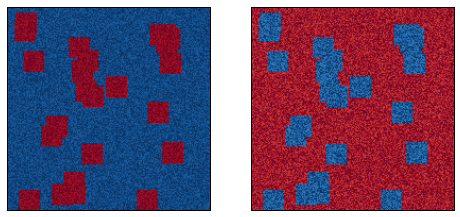

In [70]:
uvinitial = numpy.load('./uvinitial.npz') 
U = uvinitial['U']
V = uvinitial['V']

fig = pyplot.figure(figsize=(8,5)) # Le code pour produire les tableaux a été tiré des notebook.
pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

Assez logiquement, celui de gauche est l'inverse de celui de droite.


Discrétisons les deux équations de notre modèle et implémentons les en prenant en compte les conditions initiales.

In [71]:
def ftcs(U, V, Du, Dv, nt, dt, dh, F, k):
    
    au = Du/dh**2       # Nous précalculons déjà les constantes afin d'éviter de les calculer à chaque itération.
    av = Dv/dh**2
    Fk = F+k
    
    for n in range(nt): # Cette boucle est réalisée 8301 fois afin d'atteindre le temps requis
        
        Un = U.copy() 
        Vn = V.copy()
        
    # Nous remplissons la matrice U avec notre équation de discrétisation factorisée
        
        U[1:-1,1:-1] = dt*(Un[1:-1,1:-1]*((1/dt) - 4*au - (Vn[1:-1,1:-1])**2 - F)\
                          + au*(Un[2:,1:-1]  + Un[:-2,1:-1] + Un[1:-1,2:] + Un[1:-1,:-2]) + F)
        
    # Idem pour la matrice V, l'équation est légèrement différente comme on peut s'y attendre d'après l'énoncé
        
        V[1:-1,1:-1] = dt*(Vn[1:-1,1:-1]*((1/dt) - 4*av + (Un[1:-1,1:-1])*(Vn[1:-1,1:-1]) - Fk)\
                          + av*(Vn[2:,1:-1]  + Vn[:-2,1:-1] + Vn[1:-1,2:] + Vn[1:-1,:-2]))
        
    # Imposons les conditions au bord de Neumann, sur chaque côté, pour U et pour V
        
        U[0,:] = U[1,:] 
        V[0,:] = V[1,:]
        U[:,0] = U[:,1]
        V[:,0] = V[:,1]
        U[-1,:] = U[-2,:]
        U[:,-1] = U[:,-2]
        V[-1,:] = V[-2,:]
        V[:,-1] = V[:,-2]

        
    return U,V

Effectuons maintenant cette fonction.
Réutilisons le code pour visualiser l'avancement des concentrations après 8000 secondes.

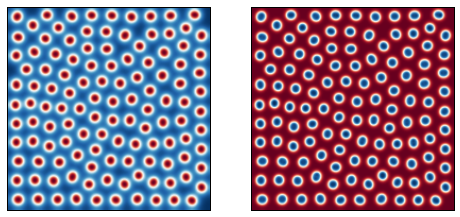

In [72]:
ftcs(U, V, Du, Dv, nt, dt, dh, F, k)

fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

### NUMERICAL INPUT

Répondons maintenant à la question en utilisant le bout de code de l'énoncé

In [73]:
U[100,::40] # Nous demandons des éléments de la 100eme ligne, un élément toute les 40 colonnes.
            # Comme il y a 192 colonnes, ce code nous sort 5 éléments.

array([ 0.92469521,  0.85013834,  0.66815621,  0.90196481,  0.9039502 ])

Ce sont effectivement les bonnes valeurs!

### Pour aller plus loin...

#### Bacteria 2 

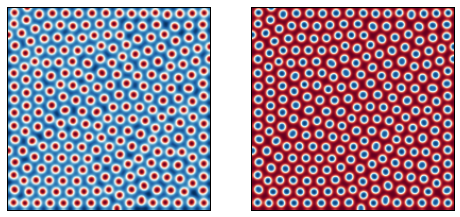

In [74]:
Du, Dv, F, k = 0.00014, 0.00006, 0.035, 0.065 # Bacteria 2

dt = .9 * dh**2 / (4*max(Du,Dv)) # durée d'un intervalle de temps

nt = int(T/dt)

uvinitial = numpy.load('./uvinitial.npz') 
U = uvinitial['U']
V = uvinitial['V']

ftcs(U, V, Du, Dv, nt, dt, dh, F, k)

fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

#### Coral

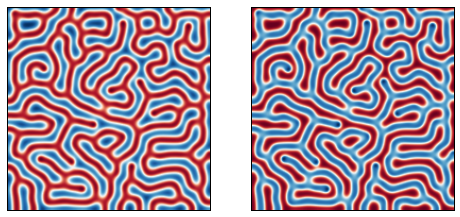

In [75]:
Du, Dv, F, k = 0.00016, 0.00008, 0.060, 0.062 # Coral

dt = .9 * dh**2 / (4*max(Du,Dv)) # durée d'un intervalle de temps

nt = int(T/dt)

uvinitial = numpy.load('./uvinitial.npz') 
U = uvinitial['U']
V = uvinitial['V']

ftcs(U, V, Du, Dv, nt, dt, dh, F, k)

fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

#### Fingerprint

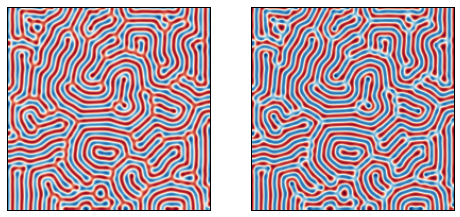

In [76]:
Du, Dv, F, k = 0.00019, 0.00005, 0.060, 0.062 # Fingerprint

dt = .9 * dh**2 / (4*max(Du,Dv)) # durée d'un intervalle de temps

nt = int(T/dt)

uvinitial = numpy.load('./uvinitial.npz') 
U = uvinitial['U']
V = uvinitial['V']

ftcs(U, V, Du, Dv, nt, dt, dh, F, k)

fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

#### Unstable

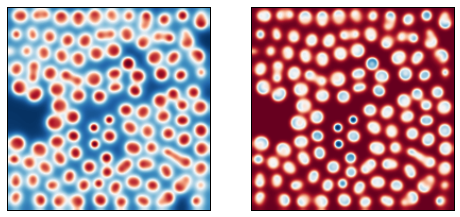

In [77]:
Du, Dv, F, k = 0.00016, 0.00008, 0.020, 0.055 # Unstable

dt = .9 * dh**2 / (4*max(Du,Dv)) # durée d'un intervalle de temps

nt = int(T/dt)

uvinitial = numpy.load('./uvinitial.npz') 
U = uvinitial['U']
V = uvinitial['V']

ftcs(U, V, Du, Dv, nt, dt, dh, F, k)

fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

#### Worms 1

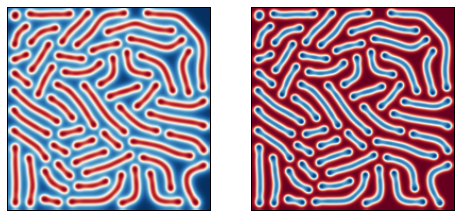

In [78]:
Du, Dv, F, k = 0.00016, 0.00008, 0.050, 0.065 # Worms 1

dt = .9 * dh**2 / (4*max(Du,Dv)) # durée d'un intervalle de temps

nt = int(T/dt)

uvinitial = numpy.load('./uvinitial.npz') 
U = uvinitial['U']
V = uvinitial['V']

ftcs(U, V, Du, Dv, nt, dt, dh, F, k)

fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

#### Worms 2

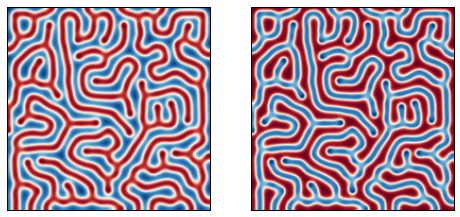

In [79]:
Du, Dv, F, k = 0.00016, 0.00008, 0.054, 0.063 # Worms 2

dt = .9 * dh**2 / (4*max(Du,Dv)) # durée d'un intervalle de temps

nt = int(T/dt)

uvinitial = numpy.load('./uvinitial.npz') 
U = uvinitial['U']
V = uvinitial['V']

ftcs(U, V, Du, Dv, nt, dt, dh, F, k)

fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

#### Zebrafish

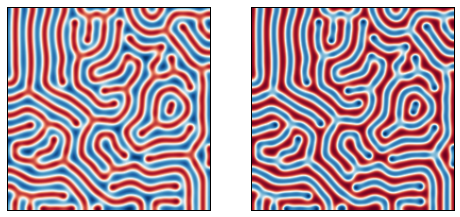

In [80]:
Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.060 # Zebrafish

dt = .9 * dh**2 / (4*max(Du,Dv)) # durée d'un intervalle de temps

nt = int(T/dt)

uvinitial = numpy.load('./uvinitial.npz') 
U = uvinitial['U']
V = uvinitial['V']

ftcs(U, V, Du, Dv, nt, dt, dh, F, k)

fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

## Conclusion

Le modèle de Gray-Scott est assez convainquant et a l'air de bien décrire la physique de ces réactions de diffusion. Néanmoins, notre fonction fcts prend beaucoup de temps malgré nos tentatives de l'optimiser.